<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def mean(num_list):
    total_sum = 0
    is_num = 0
    
    for num in num_list:
        if type(num) == int or type(num) == float:
            is_num = is_num + 1
            total_sum  = total_sum + num

            
    average = total_sum / is_num
    
    return average

In [2]:
num_list  = [3,10,2,-4,5.8 , 0 , 'opppss' , 'these' , 'is not a num' , {'key' : 3}]

mean(num_list)

2.8000000000000003

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def std(num_list):
    
    average = mean(num_list)
    
    is_num = 0
    sum_square = 0
    
    for num in num_list:
        if type(num) == int or type(num) == float:
            is_num = is_num + 1
            sum_square = sum_square + (average - num)**2
            
    stdev = (sum_square / (is_num-1))**0.5
    
    
    return stdev

In [4]:
std(num_list)

4.808326112068523

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
def percent_cleaner(percentage):
    
    return float(percentage.replace('%' , ''))/100

In [6]:
percent_cleaner('30.5%')

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

## Problem Statement

As part of JustHangOn Consulting Group, we have been tasked by US Education department to provide recommendation on **how might we** be able to increase the SAT /ACT participate rate and score , **so that** the US education ranking system remain competitive and relevant globally.

We will be studying the trends into the effect of individual key category in, and will provide key insights base on the following key category :
- States,
- Races,
- College Major,
- Household Income and State Income,
- Fee Waiver and Grant

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

## 0.0 Import Libraries
___

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

sns.set()

---
## 1.0 Importing Datasets & Data Cleaning
---

In [8]:
# Importing SAT CSV file
df_2019_sat = pd.read_csv('../data/sat_2019.csv')
df_2018_sat = pd.read_csv('../data/sat_2018.csv')
df_2017_sat = pd.read_csv('../data/sat_2017.csv')

# Importing ACT CSV file
df_2019_act = pd.read_csv('../data/act_2019.csv')
df_2018_act = pd.read_csv('../data/act_2018.csv')
df_2017_act = pd.read_csv('../data/act_2017.csv')

### 1.1 Dataframe Overview
___

In [9]:
df_2017_act.head()

State Participation  English  Math  Reading  Science Composite
0  National           60%     20.3  20.7     21.4     21.0      21.0
1   Alabama          100%     18.9  18.4     19.7     19.4      19.2
2    Alaska           65%     18.7  19.8     20.4     19.9      19.8
3   Arizona           62%     18.6  19.8     20.1     19.8      19.7
4  Arkansas          100%     18.9  19.0     19.7     19.5      19.4

In [10]:
df_2019_act.info() , df_2018_act.info() , df_2017_act.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation

(None, None, None)

In [11]:
df_2017_sat.head()

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            5%                                 593   572   1165
1      Alaska           38%                                 547   533   1080
2     Arizona           30%                                 563   553   1116
3    Arkansas            3%                                 614   594   1208
4  California           53%                                 531   524   1055

In [12]:
df_2019_sat.info() , df_2018_sat.info() , df_2017_sat.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                

(None, None, None)

### 1.2 Checking for null value

- **Year 2017 ACT** score, it is observed that the composite score is 'object' , and not float. This indicate that some of the value is a string.
- At year 2017 row Wyoming, value is 20.2x instead of 20.2
___

In [13]:
df_2019_act.head(10)

State Participation  Composite
0               Alabama          100%       18.9
1                Alaska           38%       20.1
2               Arizona           73%       19.0
3              Arkansas          100%       19.3
4            California           23%       22.6
5              Colorado           27%       23.8
6           Connecticut           22%       25.5
7              Delaware           13%       24.1
8  District of Columbia           32%       23.5
9               Florida           54%       20.1

In [14]:
df_2019_act.isnull().sum() ,df_2018_act.isnull().sum() , df_2017_act.isnull().sum()

(State            0
 Participation    0
 Composite        0
 dtype: int64,
 State            0
 Participation    0
 Composite        0
 dtype: int64,
 State            0
 Participation    0
 English          0
 Math             0
 Reading          0
 Science          0
 Composite        0
 dtype: int64)

In [15]:
df_2019_sat.isnull().sum() ,df_2018_sat.isnull().sum() , df_2017_sat.isnull().sum()

(State                 0
 Participation Rate    0
 EBRW                  0
 Math                  0
 Total                 0
 dtype: int64,
 State                                 0
 Participation                         0
 Evidence-Based Reading and Writing    0
 Math                                  0
 Total                                 0
 dtype: int64,
 State                                 0
 Participation                         0
 Evidence-Based Reading and Writing    0
 Math                                  0
 Total                                 0
 dtype: int64)

In [16]:
df_2017_act.tail()

State Participation  English  Math  Reading  Science Composite
47       Virginia           29%     23.5  23.3     24.6     23.5      23.8
48     Washington           29%     20.9  21.9     22.1     22.0      21.9
49  West Virginia           69%     20.0  19.4     21.2     20.5      20.4
50      Wisconsin          100%     19.7  20.4     20.6     20.9      20.5
51        Wyoming          100%     19.4  19.8     20.8     20.6     20.2x

In [17]:
"""
1. Replaced 20.2x with 20.x
2. Convert Composite Column into astype Float
"""
df_2017_act['Composite'][51] = 20.2
df_2017_act['Composite'] = df_2017_act['Composite'].astype(float)
df_2017_act.tail()

<ipython-input-17-65fe14908202>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_act['Composite'][51] = 20.2


State Participation  English  Math  Reading  Science  Composite
47       Virginia           29%     23.5  23.3     24.6     23.5       23.8
48     Washington           29%     20.9  21.9     22.1     22.0       21.9
49  West Virginia           69%     20.0  19.4     21.2     20.5       20.4
50      Wisconsin          100%     19.7  20.4     20.6     20.9       20.5
51        Wyoming          100%     19.4  19.8     20.8     20.6       20.2

### 1.3 Checking for data accuracy

- A quick observation on the accuracy checks from year 2017 to 2019 seems to indicate that there is a +/- 1 error on the total score, probably due to rounding error.
- There is an major error on 2017 SAT dataset : Maryland : Math Score is 52 instead of 524
- There is duplicate value for 2018 ACT dataset : Maine
- At year 2018 , there is spelling difference for District of columbia
___

#### 1.3.1 2017 SAT Data Sets

In [18]:
# Checking for Score Accuracy
df_2017_sat[df_2017_sat['Math'] + df_2017_sat['Evidence-Based Reading and Writing'] != df_2017_sat['Total']].head(3)

State Participation  Evidence-Based Reading and Writing  Math  Total
6   Connecticut          100%                                 530   512   1041
7      Delaware          100%                                 503   492    996
12        Idaho           93%                                 513   493   1005

In [19]:
# Checking for Score Accuracy
df_2017_sat[(df_2017_sat['Math'] > 800) | (df_2017_sat['Math'] < 200) ]

State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060

In [20]:
"""
1. Assume Correct Total Score. 
2. Replace Math score from 52 to 524

"""
df_2017_sat['Math'][20] = 524

<ipython-input-20-14e8b7581589>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_sat['Math'][20] = 524


In [21]:
# Checking for Score Accuracy
df_2017_sat[(df_2017_sat['Evidence-Based Reading and Writing'] > 800) | (df_2017_sat['Evidence-Based Reading and Writing'] < 200) ]

Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []

#### 1.3.2 2018 SAT Data Sets

In [22]:
# Checking for State Name Accuracy
df_2017_sat['State'].isin(df_2018_sat['State']).value_counts()

True    51
Name: State, dtype: int64

In [23]:
# Checking for Score Accuracy
df_2018_sat[df_2018_sat['Math'] + df_2018_sat['Evidence-Based Reading and Writing'] != df_2018_sat['Total']].head(3)

State Participation  Evidence-Based Reading and Writing  Math  Total
3     Arkansas            5%                                 592   576   1169
6  Connecticut          100%                                 535   519   1053
7     Delaware          100%                                 505   492    998

In [24]:
# Checking for Score Accuracy
df_2018_sat[(df_2018_sat['Math'] > 800) | (df_2018_sat['Math'] < 200) ]
df_2018_sat[(df_2018_sat['Evidence-Based Reading and Writing'] > 800) | (df_2018_sat['Evidence-Based Reading and Writing'] < 200) ]

Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []

#### 1.3.3 2019 SAT Data Sets

In [25]:
# Checking for State Name Accuracy
df_2017_sat['State'].isin(df_2019_sat['State']).value_counts()

True    51
Name: State, dtype: int64

In [26]:
# Checking for Score Accuracy
df_2019_sat[df_2019_sat['Math'] + df_2019_sat['EBRW'] != df_2019_sat['Total']].head(3)

State Participation Rate  EBRW  Math  Total
6   Connecticut               100%   529   516   1046
10      Georgia                71%   538   519   1058
18    Louisiana                 5%   610   591   1200

In [27]:
# Checking for Score Accuracy
df_2019_sat[(df_2019_sat['Math'] > 800) | (df_2019_sat['Math'] < 200) ]
df_2019_sat[(df_2019_sat['EBRW'] > 800) | (df_2019_sat['EBRW'] < 200) ]

Empty DataFrame
Columns: [State, Participation Rate, EBRW, Math, Total]
Index: []

#### 1.3.4 2017 ACT Data Sets

In [28]:
# Checking for 2017 Score Accuracy
df_2017_act[df_2017_act['Composite'] > 36]

Empty DataFrame
Columns: [State, Participation, English, Math, Reading, Science, Composite]
Index: []

#### 1.3.5 2018 ACT Data Sets

- It is observed that there is duplicate State for 2018 ACT
- It is observed that District of columbia is spelled differently

In [29]:
# Checking for State Name Accuracy (2017 and 2018)
df_2017_act['State'].isin(df_2018_act['State']).value_counts()

True     50
False     2
Name: State, dtype: int64

In [30]:
df_2017_act['State'].isin(df_2018_act['State']).head(10)

0    False
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: State, dtype: bool

In [31]:
# Correcting District of columbia into District of Columbia
df_2018_act['State'][8] = 'District of Columbia'

<ipython-input-31-049f736c9299>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_act['State'][8] = 'District of Columbia'


In [32]:
# # Checking for 2018 Score Accuracy
df_2018_act[df_2018_act['Composite'] > 36]

Empty DataFrame
Columns: [State, Participation, Composite]
Index: []

In [33]:
# Duplicates in State
df_2018_act.groupby('State').count().sort_values(ascending = False,
                                                 by = 'Composite').head()

Participation  Composite
State                                  
Maine                      2          2
Alabama                    1          1
Montana                    1          1
Nevada                     1          1
New Hampshire              1          1

In [34]:
df_2018_act.drop(axis = 0,
                 index = 20,
                 inplace = True)

In [35]:
df_2018_act.reset_index(inplace = True,
                        drop = True)

#### 1.3.6 2019 ACT Data Sets

In [36]:
# Checking for State Name Accuracy
df_2017_act['State'].isin(df_2019_act['State']).value_counts()

True    52
Name: State, dtype: int64

In [37]:
# Checking for 2019 Score Accuracy
df_2019_act[df_2019_act['Composite'] > 36]

Empty DataFrame
Columns: [State, Participation, Composite]
Index: []

### 1.4 Merging datasets
---

#### 1.4.1 SAT Datasets
- It is observed that there is insufficient data for 2017 , 2018 data for **Puerto Rico and Virgin Island**, therefore it will be drop for comparison

In [38]:
"""
1. Perform a column rename for all
2. Do a merge on 2017 and 2018.
3. Do a merge with 2019.
4. Remove % from participation and redefine astype float

"""

def column_rename(sat_or_act , yr , df):
    act_col_dict = {'Participation' : 'act_pr_' + str(yr),
                  'Composite' : 'act_total_' + str(yr),
                   'English' : 'act_eng_' + str(yr),
                   'Math' : 'act_math_' + str(yr),
                   'Science' : 'act_sci_' + str(yr),
                   'Reading' : 'act_read_' + str(yr)}
    
    sat_col_dict = {'Participation' : 'sat_pr_' + str(yr),
                  'Participation Rate' : 'sat_pr_' + str(yr),
                  'Evidence-Based Reading and Writing' : 'sat_ebrw_' + str(yr),
                  'EBRW' : 'sat_ebrw_' + str(yr),
                  'Math' : 'sat_math_' + str(yr),
                  'Total' : 'sat_total_' + str(yr)}
    
    if str(sat_or_act) == 'sat':
        df.rename(columns = sat_col_dict , 
                  inplace = True) 
        
    elif str(sat_or_act) == 'act':
        df.rename(columns = act_col_dict , 
                  inplace = True)     

In [39]:
column_rename('sat', 2017 , df_2017_sat)
column_rename('sat', 2018 , df_2018_sat)
column_rename('sat', 2019 , df_2019_sat)

column_rename('act', 2017 , df_2017_act)
column_rename('act', 2018 , df_2018_act)
column_rename('act', 2019 , df_2019_act)

In [40]:
df_1718_sat = df_2017_sat.merge(df_2018_sat,
                                how = 'left',
                                on = 'State')

df_1719_sat = df_1718_sat.merge(df_2019_sat,
                                how = 'right',
                                on = 'State')

df_1719_sat[df_1719_sat['State'].isin(['Puerto Rico' , 'Virgin Islands'])]

State sat_pr_2017  sat_ebrw_2017  sat_math_2017  sat_total_2017  \
39     Puerto Rico         NaN            NaN            NaN             NaN   
47  Virgin Islands         NaN            NaN            NaN             NaN   

   sat_pr_2018  sat_ebrw_2018  sat_math_2018  sat_total_2018 sat_pr_2019  \
39         NaN            NaN            NaN             NaN           —   
47         NaN            NaN            NaN             NaN           —   

    sat_ebrw_2019  sat_math_2019  sat_total_2019  
39            483            462             944  
47            490            445             935

In [41]:
# Left Merge to remove Puerto Rico and Virgin Islands
df_1719_sat = df_1718_sat.merge(df_2019_sat,
                                how = 'left',
                                on = 'State')

In [42]:
df_1719_sat.head()

State sat_pr_2017  sat_ebrw_2017  sat_math_2017  sat_total_2017  \
0     Alabama          5%            593            572            1165   
1      Alaska         38%            547            533            1080   
2     Arizona         30%            563            553            1116   
3    Arkansas          3%            614            594            1208   
4  California         53%            531            524            1055   

  sat_pr_2018  sat_ebrw_2018  sat_math_2018  sat_total_2018 sat_pr_2019  \
0          6%            595            571            1166          7%   
1         43%            562            544            1106         41%   
2         29%            577            572            1149         31%   
3          5%            592            576            1169          6%   
4         60%            540            536            1076         63%   

   sat_ebrw_2019  sat_math_2019  sat_total_2019  
0            583            560            1143  
1            556            541            1097  
2            569            565            1134  
3            582            559            1141  
4            534            531            1065

In [43]:
# Remove % and redfine column as float
for i in df_1719_sat:
    if 'pr' in i:
        df_1719_sat[i] = df_1719_sat[i].str.replace('%' , '').astype(float)

In [44]:
df_1719_sat.head()

State  sat_pr_2017  sat_ebrw_2017  sat_math_2017  sat_total_2017  \
0     Alabama          5.0            593            572            1165   
1      Alaska         38.0            547            533            1080   
2     Arizona         30.0            563            553            1116   
3    Arkansas          3.0            614            594            1208   
4  California         53.0            531            524            1055   

   sat_pr_2018  sat_ebrw_2018  sat_math_2018  sat_total_2018  sat_pr_2019  \
0          6.0            595            571            1166          7.0   
1         43.0            562            544            1106         41.0   
2         29.0            577            572            1149         31.0   
3          5.0            592            576            1169          6.0   
4         60.0            540            536            1076         63.0   

   sat_ebrw_2019  sat_math_2019  sat_total_2019  
0            583            560            1143  
1            556            541            1097  
2            569            565            1134  
3            582            559            1141  
4            534            531            1065

#### 1.4.2 ACT Datasets

In [45]:
"""
1. Perform a column rename for all
2. Do a merge on 2017 , 2018 and 2019.
3a. Drop 2017 English , Math , Reading , Science Score
3b. Drop National due to lack of data in 2018
4. Remove % from particpation and redefine astype float

"""

df_1718_act = df_2017_act.merge(df_2018_act,
                                how = 'left',
                                on = 'State')

df_1719_act = df_1718_act.merge(df_2019_act,
                                how = 'right',
                                on = 'State')

In [46]:
df_1719_act.drop(axis = 0,
                 index = 51 ,
                 inplace = True)

In [47]:
for i in df_1719_act:
    if 'pr' in i:
        df_1719_act[i] = df_1719_act[i].str.replace('%' , '').astype(float)

## 1.5 Combining SAT and ACT Dataframe
---

In [48]:
"""
1. Drop 2017 ACT score for eng , math , read and sci, as 2018 and 2019 does not have those score
"""

df_sat_act = df_1719_sat.merge(df_1719_act,
                               how = 'left',
                               on = 'State')

to_drop_columns = ['act_eng_2017' , 'act_sci_2017' , 'act_read_2017' , 'act_math_2017']
df_sat_act.drop(columns = to_drop_columns,
                inplace = True)

In [49]:
df_sat_act.head()

State  sat_pr_2017  sat_ebrw_2017  sat_math_2017  sat_total_2017  \
0     Alabama          5.0            593            572            1165   
1      Alaska         38.0            547            533            1080   
2     Arizona         30.0            563            553            1116   
3    Arkansas          3.0            614            594            1208   
4  California         53.0            531            524            1055   

   sat_pr_2018  sat_ebrw_2018  sat_math_2018  sat_total_2018  sat_pr_2019  \
0          6.0            595            571            1166          7.0   
1         43.0            562            544            1106         41.0   
2         29.0            577            572            1149         31.0   
3          5.0            592            576            1169          6.0   
4         60.0            540            536            1076         63.0   

   sat_ebrw_2019  sat_math_2019  sat_total_2019  act_pr_2017  act_total_2017  \
0            583            560            1143        100.0            19.2   
1            556            541            1097         65.0            19.8   
2            569            565            1134         62.0            19.7   
3            582            559            1141        100.0            19.4   
4            534            531            1065         31.0            22.8   

   act_pr_2018  act_total_2018  act_pr_2019  act_total_2019  
0        100.0            19.1        100.0            18.9  
1         33.0            20.8         38.0            20.1  
2         66.0            19.2         73.0            19.0  
3        100.0            19.4        100.0            19.3  
4         27.0            22.7         23.0            22.6

## 1.6 Saving as CSV Files
---

In [50]:
df_sat_act.to_csv('SAT_ACT_Merged_2017_2019.csv')

## 1.7 Data Dictionary
---

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|index|SAT/ACT|State names for 50 states in the US, plus District of Columbia|
|sat_pr_2017|float|SAT|State-wide participation rate (%) in 2017| 
|sat_erbw_2017|int|SAT|State mean score for Evidence-Based Reading and Writing (ERW) in 2017|
|sat_math_2017|int|SAT|State mean score for Math in 2017|
|sat_total_2017|int|SAT|State mean total (combined score for ERW and Math) in 2018|
|sat_pr_2018|float|SAT|State-wide participation rate (%) in 2018| 
|sat_erbw_2018|int|SAT|State mean score for Evidence-Based Reading and Writing (ERW) in 2018|
|sat_math_2018|int|SAT|State mean score for Math in 2018|
|sat_total_2018|int|SAT|State mean total (combined score for ERBW and Math) in 2018|
|sat_pr_2019|float|SAT|State-wide participation rate (%) in 2019| 
|sat_erbw_2019|int|SAT|State mean score for Evidence-Based Reading and Writing (ERBW) in 2019|
|sat_math_2019|int|SAT|State mean score for Math in 2019|
|sat_total_2019|int|SAT|State mean total (combined score for ERBW and Math) in 2019|
||
|act_pr_2017|float|ACT|State-wide participation rate (%) in 2017| 
|act_total_2017|float|ACT|State mean composite score (average score for English, Math, Reading, and Science) in 2017|
|act_pr_2018|float|ACT|State-wide participation rate (%) in 2018| 
|act_total_2018|float|ACT|State mean composite score (average score for English, Math, Reading, and Science) in 2018|
|act_pr_2019|float|ACT|State-wide participation rate (%) in 2019| 
|act_total_2019|float|ACT|State mean composite score (average score for English, Math, Reading, and Science) in 2019|
||
|2019 Household Median Income|float|State|2019 Median Household Income by US States| 
|2019 Household Ranking|float|State|2019 Median Household Income Ranking by US States. No.1 has highest median household income|
|2019 Gini Coeff|float|State|2019 Gini Coefficient by US States| 
|2019 Gini Ranking|float|State|2019 Gini Coeff Ranking by US States. No.1 has lowest Gini Coeff.|
|2019 Poverty Rate|float|State|2019 Poverty Rate in % by US States| 

---
## 2.0 Exploratory Data Analysis
---

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### 2.1 Summary Statistics
---

**2017 SAT** 
- Participation Rate is at **mean** = 40% (STD = 35%) , **min** = 2% , **max** = 100%
- EBRW Score is at **mean** = 569 (STD = 46) , **min** score = 482 , **max** score = 644
- Math Score is at **mean** = 557 (STD = 47) , **min** score = 468 , **max** score = 651
- Total Score is at **mean** = 1126 (STD = 92) , **min** score = 965 , **max** score = 1295

**2018 SAT** 
- Participation Rate is at **mean** = 46% (STD = 37%) , **min** = 2% , **max** = 100%
- EBRW Score is at **mean** = 564 (STD = 48) , **min** score = 480 , **max** score = 643
- Math Score is at **mean** = 556 (STD = 48) , **min** score = 480 , **max** score = 655
- Total Score is at **mean** = 1120 (STD = 94) , **min** score = 977 , **max** score = 1298

**2019 SAT** 
- Participation Rate is at **mean** = 49% (STD = 39%) , **min** = 2% , **max** = 100%
- EBRW Score is at **mean** = 560 (STD = 46) , **min** score = 483 , **max** score = 636
- Math Score is at **mean** = 552 (STD = 51) , **min** score = 460 , **max** score = 648
- Total Score is at **mean** = 1113 (STD = 97) , **min** score = 943 , **max** score = 1284

In [51]:
df_sat_act.describe().T

count         mean        std    min      25%     50%  \
sat_pr_2017      51.0    39.803922  35.276632    2.0     4.00    38.0   
sat_ebrw_2017    51.0   569.117647  45.666901  482.0   533.50   559.0   
sat_math_2017    51.0   556.882353  47.121395  468.0   523.50   548.0   
sat_total_2017   51.0  1126.098039  92.494812  950.0  1055.50  1107.0   
sat_pr_2018      51.0    45.745098  37.314256    2.0     4.50    52.0   
sat_ebrw_2018    51.0   563.686275  47.502627  480.0   534.50   552.0   
sat_math_2018    51.0   556.235294  47.772623  480.0   522.50   544.0   
sat_total_2018   51.0  1120.019608  94.155083  977.0  1057.50  1098.0   
sat_pr_2019      51.0    49.058824  38.747600    2.0     5.50    54.0   
sat_ebrw_2019    51.0   560.803922  46.248035  483.0   527.50   550.0   
sat_math_2019    51.0   552.196078  51.290553  460.0   511.50   546.0   
sat_total_2019   51.0  1113.078431  97.197910  943.0  1038.00  1097.0   
act_pr_2017      51.0    65.254902  32.140842    8.0    31.00    69.0   
act_total_2017   51.0    21.519608   2.020695   17.8    19.80    21.4   
act_pr_2018      51.0    61.725490  34.037085    7.0    28.50    66.0   
act_total_2018   51.0    21.496078   2.111583   17.7    19.95    21.3   
act_pr_2019      51.0    58.666667  34.515890    6.0    24.50    54.0   
act_total_2019   51.0    21.464706   2.194523   17.9    19.80    21.1   

                    75%     max  
sat_pr_2017       66.00   100.0  
sat_ebrw_2017    613.00   644.0  
sat_math_2017    599.00   651.0  
sat_total_2017  1212.00  1295.0  
sat_pr_2018       77.50   100.0  
sat_ebrw_2018    610.50   643.0  
sat_math_2018    593.50   655.0  
sat_total_2018  1204.00  1298.0  
sat_pr_2019       82.00   100.0  
sat_ebrw_2019    612.00   636.0  
sat_math_2019    599.00   648.0  
sat_total_2019  1210.00  1284.0  
act_pr_2017      100.00   100.0  
act_total_2017    23.60    25.5  
act_pr_2018      100.00   100.0  
act_total_2018    23.65    25.6  
act_pr_2019      100.00   100.0  
act_total_2019    23.70    25.5

### 2.2 Standard Deviation Function From Part 1
---

#### 2.2.1 Std for SAT & ACT Dataframe

In [52]:
sd_act = {column : std(df_sat_act[column]) for column in df_sat_act.drop(columns = 'State')}
sd_act

{'sat_pr_2017': 35.276632270013046,
 'sat_ebrw_2017': 45.66690138768932,
 'sat_math_2017': 47.12139516560329,
 'sat_total_2017': 92.49481172519046,
 'sat_pr_2018': 37.31425633039196,
 'sat_ebrw_2018': 47.50262737831599,
 'sat_math_2018': 47.77262322095955,
 'sat_total_2018': 94.15508275097599,
 'sat_pr_2019': 38.747599546142666,
 'sat_ebrw_2019': 46.24803546437109,
 'sat_math_2019': 51.29055258343124,
 'sat_total_2019': 97.1979100880785,
 'act_pr_2017': 32.14084201588683,
 'act_total_2017': 2.020694891154341,
 'act_pr_2018': 34.03708473496081,
 'act_total_2018': 2.111583366510896,
 'act_pr_2019': 34.51589006047312,
 'act_total_2019': 2.1945225931315235}

### 2.3 Investigative Trends
--- 

**Participation Rate (PR)**
* 100% SAT participation rates for 3 states and 100% ACT participation rates for 13 states from 2017 : 2019. Most of these states are inside the mandatory SAT and ACT rules respectively.
* General trend that states that have high PR in one test will have a lower PR in another test. For example, a state that has high PR in SAT will have low PR in ACT. This trend make sense as well, since usually students are only required to take either or. **See section 3.2 for the supporting graph visualisation**
* 3 States (Florida , Georgia , Hawaii) had >50% participation rate for both test in 2017. 5 States (Florida , Georgia , Hawaii , North and South Carolina) achieved that in 2018. Georgia fall below the 50% mark for ACT in 2019
* Colorado appear to have a change in mandatory from ACT in 2017 to SAT in 2018
___

**Score**
* States are usually specialised in scoring well in one of the test ; There is no State that score well in both SAT ands ACT. **See section 3.1 scatter plot for suppporting graph visualisation**

* New Hampshire , Massachusetts , Connecticut have consistently top the ACT score from 2017 to 2019
* South Carolina , Mississippi , Nevada have consistently bottom the ACT score from 2017 to 2019
___


**Score and **Participation Rate (PR) Relationship**
* PR have an inverse relation with Score. Lower Participation rate in a test , generally have a better score. This could be due to the possible reasoning that these participants are taking additional tests as secondary supplement, and since they are competetive in personal nature, they tend to work harder and score better. Furthuermore, there will also be lesser non-motivated people to dilute the score. **See Section 3.3 for the supporting graph visualisation**


___

#### 2.3.1 Exploring Participation Rate

In [53]:
"""
# General Filter List
1. Create a filter list of state & participation across all years
2. Create a filter list of state & score across all years

"""

pr_filter_list = ['State']
for column in df_sat_act:
    if 'pr' in column:
        pr_filter_list.append(column)
        
score_filter_list = ['State']
for column in df_sat_act:
    if 'total' in column:
        score_filter_list.append(column)

In [54]:
# 100% ACT Participation
"""
States that have mandatory ACT : 
Alabama, 'Hawaii, 'Kentucky, 
Louisiana, Mississippi, Missouri, Montana, Nebraska, 
Nevada, North Carolina, South Carolina, Utah, Wisconsin, Wyoming
"""

df_sat_act[(df_sat_act['act_pr_2017'] == 100) & (df_sat_act['act_pr_2018'] == 100) & (df_sat_act['act_pr_2019'] == 100)][pr_filter_list]

State  sat_pr_2017  sat_pr_2018  sat_pr_2019  act_pr_2017  \
0          Alabama          5.0          6.0          7.0        100.0   
3         Arkansas          3.0          5.0          6.0        100.0   
17        Kentucky          4.0          4.0          4.0        100.0   
18       Louisiana          4.0          4.0          5.0        100.0   
24     Mississippi          2.0          3.0          3.0        100.0   
26         Montana         10.0         10.0          9.0        100.0   
28          Nevada         26.0         23.0         20.0        100.0   
33  North Carolina         49.0         52.0         51.0        100.0   
36        Oklahoma          7.0          8.0         22.0        100.0   
42       Tennessee          5.0          6.0          7.0        100.0   
44            Utah          3.0          4.0          4.0        100.0   
49       Wisconsin          3.0          3.0          3.0        100.0   
50         Wyoming          3.0          3.0          3.0        100.0   

    act_pr_2018  act_pr_2019  
0         100.0        100.0  
3         100.0        100.0  
17        100.0        100.0  
18        100.0        100.0  
24        100.0        100.0  
26        100.0        100.0  
28        100.0        100.0  
33        100.0        100.0  
36        100.0        100.0  
42        100.0        100.0  
44        100.0        100.0  
49        100.0        100.0  
50        100.0        100.0

In [55]:
# 100% SAT Participation

"""
Colorado, Connecticut, Delaware, 
Illinois, Michigan, New Hampshire, 
Rhode Island, West Virginia
"""

df_sat_act[(df_sat_act['sat_pr_2017'] == 100) & (df_sat_act['sat_pr_2018'] == 100) & (df_sat_act['sat_pr_2019'] == 100)][pr_filter_list]

State  sat_pr_2017  sat_pr_2018  sat_pr_2019  act_pr_2017  \
6   Connecticut        100.0        100.0        100.0         31.0   
7      Delaware        100.0        100.0        100.0         18.0   
22     Michigan        100.0        100.0        100.0         29.0   

    act_pr_2018  act_pr_2019  
6          26.0         22.0  
7          17.0         13.0  
22         22.0         19.0

In [56]:
# >50% SAT and ACT Participation in 2017

df_sat_act[(df_sat_act['sat_pr_2017'] > 50) &  (df_sat_act['act_pr_2017'] > 50)][pr_filter_list]

State  sat_pr_2017  sat_pr_2018  sat_pr_2019  act_pr_2017  act_pr_2018  \
9   Florida         83.0         56.0        100.0         73.0         66.0   
10  Georgia         61.0         70.0         71.0         55.0         53.0   
11   Hawaii         55.0         56.0         54.0         90.0         89.0   

    act_pr_2019  
9          54.0  
10         49.0  
11         80.0

In [57]:
# >50% SAT and ACT Participation in 2018

df_sat_act[(df_sat_act['sat_pr_2018'] > 50) &  (df_sat_act['act_pr_2018'] > 50)][pr_filter_list]

State  sat_pr_2017  sat_pr_2018  sat_pr_2019  act_pr_2017  \
9          Florida         83.0         56.0        100.0         73.0   
10         Georgia         61.0         70.0         71.0         55.0   
11          Hawaii         55.0         56.0         54.0         90.0   
33  North Carolina         49.0         52.0         51.0        100.0   
40  South Carolina         50.0         55.0         68.0        100.0   

    act_pr_2018  act_pr_2019  
9          66.0         54.0  
10         53.0         49.0  
11         89.0         80.0  
33        100.0        100.0  
40        100.0         78.0

In [58]:
# High turnover in participation

df_sat_act[(df_sat_act['act_pr_2017'] ==100) &  (df_sat_act['act_pr_2018'] < 50)][pr_filter_list]

State  sat_pr_2017  sat_pr_2018  sat_pr_2019  act_pr_2017  act_pr_2018  \
5  Colorado         11.0        100.0        100.0        100.0         30.0   

   act_pr_2019  
5         27.0

#### 2.3.2 Exploring Score

In [59]:
# SAT Score for year 2018
df_sat_act.sort_values(by = 'sat_total_2018' , ascending = False)[score_filter_list].head(10)

State  sat_total_2017  sat_total_2018  sat_total_2019  \
23     Minnesota            1295            1298            1284   
49     Wisconsin            1291            1294            1283   
34  North Dakota            1256            1283            1263   
15          Iowa            1275            1265            1244   
16        Kansas            1260            1265            1241   
25      Missouri            1271            1262            1236   
50       Wyoming            1230            1257            1238   
27      Nebraska            1253            1252            1260   
17      Kentucky            1247            1248            1232   
41  South Dakota            1216            1240            1268   

    act_total_2017  act_total_2018  act_total_2019  
23            21.5            21.3            21.4  
49            20.5            20.5            20.3  
34            20.3            20.3            19.9  
15            21.9            21.8            21.6  
16            21.7            21.6            21.2  
25            20.4            20.0            20.8  
50            20.2            20.0            19.8  
27            21.4            20.1            20.0  
17            20.0            20.2            19.8  
41            21.8            21.9            21.6

In [60]:
# SAT Score for year 2019
df_sat_act.sort_values(by = 'sat_total_2019' , ascending = False)[score_filter_list].head()

State  sat_total_2017  sat_total_2018  sat_total_2019  \
23     Minnesota            1295            1298            1284   
49     Wisconsin            1291            1294            1283   
41  South Dakota            1216            1240            1268   
34  North Dakota            1256            1283            1263   
27      Nebraska            1253            1252            1260   

    act_total_2017  act_total_2018  act_total_2019  
23            21.5            21.3            21.4  
49            20.5            20.5            20.3  
41            21.8            21.9            21.6  
34            20.3            20.3            19.9  
27            21.4            20.1            20.0

In [61]:
# ACT Top Score for year 2019
df_sat_act.sort_values(by = 'act_total_2019' , ascending = False)[score_filter_list].head()

State  sat_total_2017  sat_total_2018  sat_total_2019  \
21  Massachusetts            1107            1125            1120   
6     Connecticut            1041            1053            1046   
29  New Hampshire            1052            1063            1059   
39   Rhode Island            1062            1018             995   
32       New York            1052            1068            1064   

    act_total_2017  act_total_2018  act_total_2019  
21            25.4            25.5            25.5  
6             25.2            25.6            25.5  
29            25.5            25.1            25.0  
39            24.0            24.2            24.7  
32            24.2            24.5            24.5

In [62]:
# ACT Bottom Score for year 2019
df_sat_act.sort_values(by = 'act_total_2019' , ascending = False)[score_filter_list].tail()

State  sat_total_2017  sat_total_2018  sat_total_2019  \
0          Alabama            1165            1166            1143   
40  South Carolina            1064            1070            1030   
18       Louisiana            1198            1210            1200   
24     Mississippi            1242            1236            1237   
28          Nevada            1116            1140            1156   

    act_total_2017  act_total_2018  act_total_2019  
0             19.2            19.1            18.9  
40            18.7            18.3            18.8  
18            19.5            19.2            18.8  
24            18.6            18.6            18.4  
28            17.8            17.7            17.9

## 3.0 Visualising the Data
___

The finding from this section had been summarised and is being used to support the trend study in section 2.0

In [63]:
def scatter_plt(x , y , df , hue , title):
    sns.scatterplot(data = df,
                    x = x,
                    y = y,
                    hue = hue,
                    legend = False)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

In [64]:
def regression_plt(x , y , df , title):
    sns.regplot(data = df,
                x = x,
                y = y)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

In [65]:
def heatmap_plt(df , cmap, title):
    sns.heatmap(data = df,
                cmap = cmap,
                annot =True,
                linewidths = 0.5,
                cbar = False)
    
    plt.xticks(rotation  = 90)
    plt.yticks(rotation  = 0)         
    plt.title(title , fontsize = 16)

In [66]:
def double_barplot_plt(df , sorted_column , left_column , right_column , left_title , right_title):

    sorted_array = df.sort_values(by = sorted_column, ascending = False)


    fig, (ax1 , ax2) = plt.subplots(1,2 , figsize = (12,9) , sharey = True)


    sns.barplot(x = left_column , 
                y = sorted_array['State'], 
                data = df,
                color = 'Green',
                ax = ax1)
    ax1.invert_xaxis()
    ax1.set_ylabel('State - Rank By')
    ax1.set_title(left_title)


    sns.barplot(x = right_column , 
                y = sorted_array['State'], 
                data = df,
                color = 'lightblue',
                ax= ax2)
    ax2.set_ylabel('')
    ax2.set_title(right_title)

    plt.tight_layout(w_pad= -0.3)

In [67]:
def hist_plot(plot_list , df):
    fig , ax = plt.subplots(2,3 , figsize = (16,10))
    ax = ax.ravel()

    for i, data in enumerate(plot_list): 
        sns.histplot(data = df_sat_act,
                     x = data,
                     bins = 12,
                     color = 'skyblue',
                     ax = ax[i],
                     kde = True)
        ax[i].set(title = data,
                  xlabel = '',
                  ylabel = '')

###  3.0 Overview of SAT and ACT Score & Participation Rate
---

In [68]:
# Creating Unique List for Score and PR to loop through the plotting

test_score_list = [score for score in df_sat_act if 'total' in score]
participation_rate_list = [pr for pr in df_sat_act if 'pr' in pr]

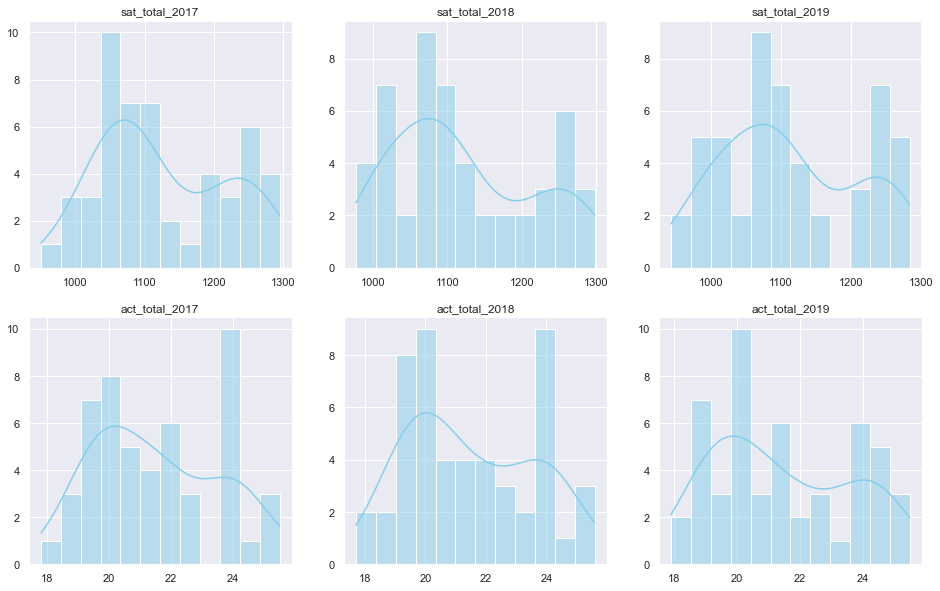

In [69]:
# Hist Plot for Test Score from 2017 - 2019

hist_plot(test_score_list , df_sat_act)

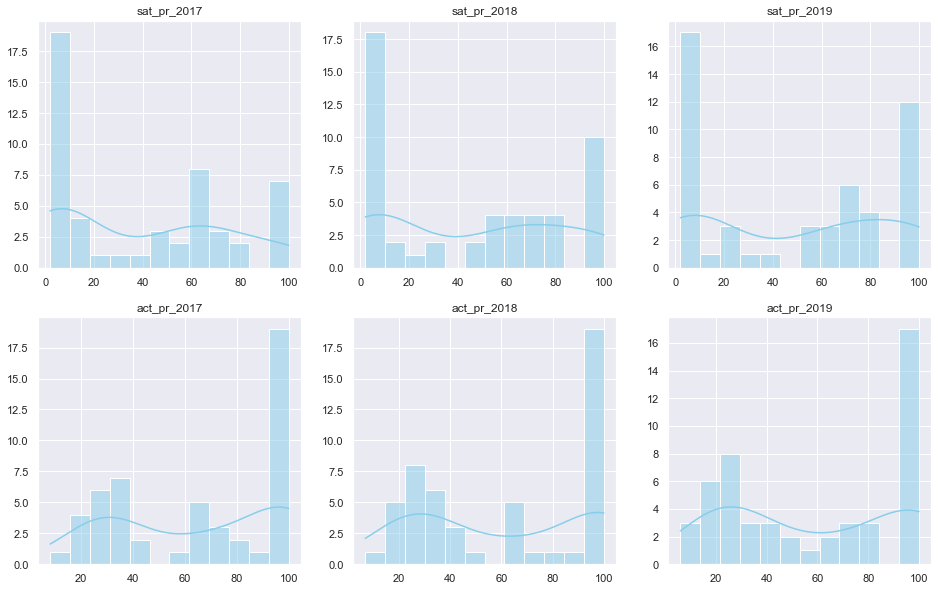

In [70]:
# Hist Plot for Participation Rate from 2017 - 2019

hist_plot(participation_rate_list , df_sat_act)

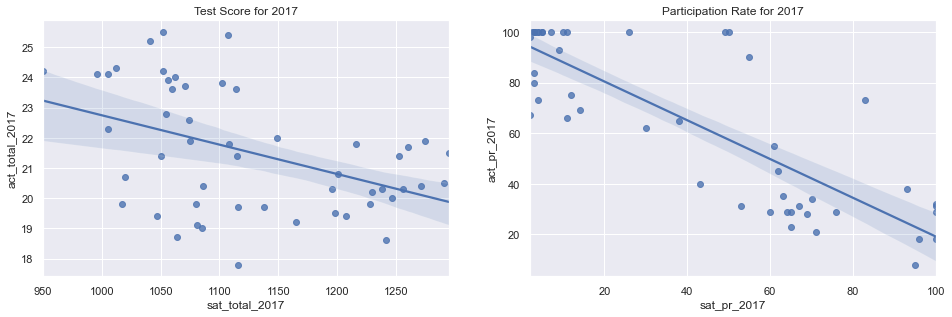

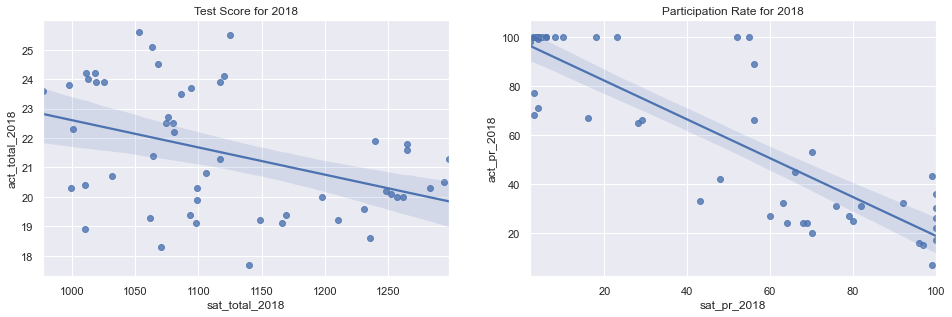

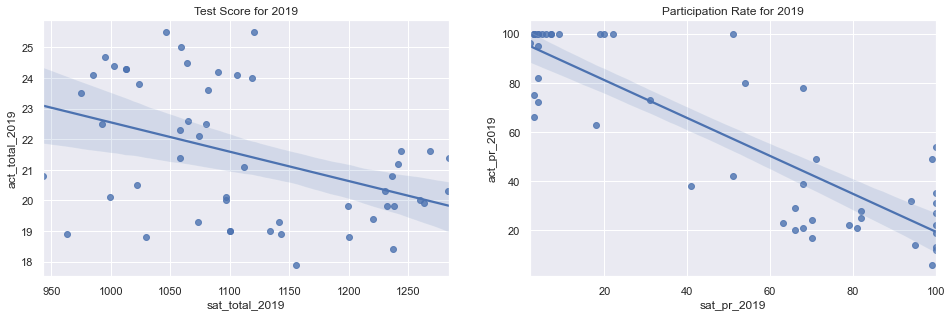

In [71]:
for i in range(1,4):
    
    plt.figure(figsize = (16,16))
    
    # Plotting All Test Score Graph on the left
    plt.subplot(3,2,2*i-1) 
    regression_plt(test_score_list[i-1], test_score_list[i+2] , df_sat_act , 'Test Score for '+ str(i+2016))
    
    # Plotting All Participation Graph on the Right
    plt.subplot(3,2,2*i)
    regression_plt(participation_rate_list[i-1], participation_rate_list[i+2] , df_sat_act , 'Participation Rate for ' + str(i+2016))

###  3.1 Test Score Comparison Per Year
---

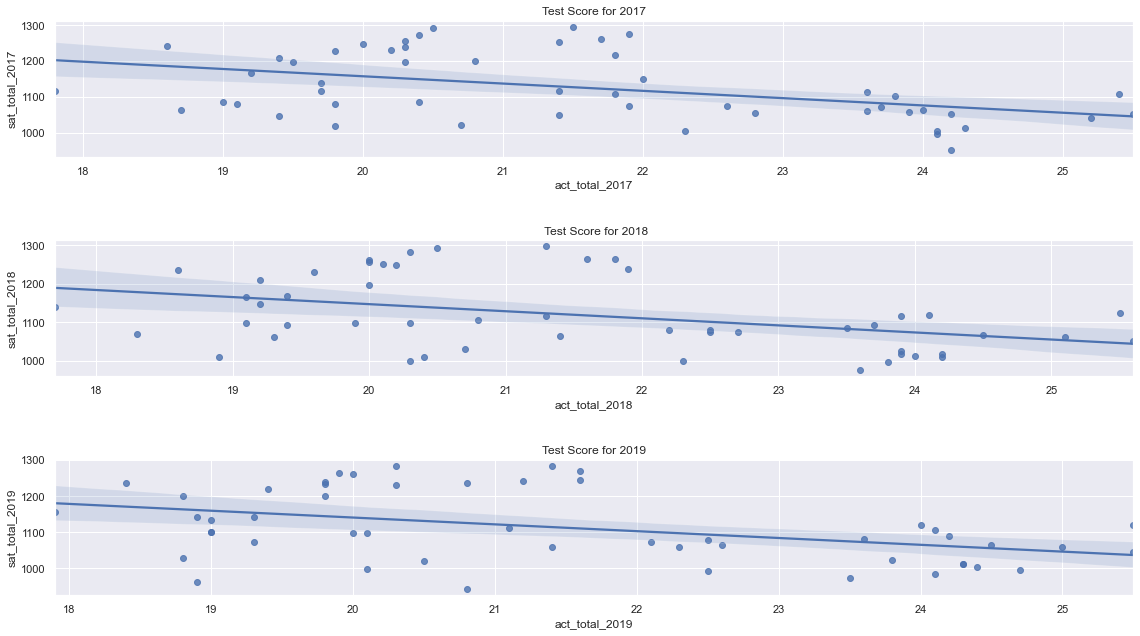

In [72]:
plt.figure(figsize = (16,9))

plt.subplot(3,1,1)
regression_plt('act_total_2017', 'sat_total_2017' , df_sat_act , 'Test Score for 2017')

plt.subplot(3,1,2)
regression_plt('act_total_2018', 'sat_total_2018' , df_sat_act , ' Test Score for 2018')

plt.subplot(3,1,3)
regression_plt('act_total_2019', 'sat_total_2019' , df_sat_act , 'Test Score for 2019')

plt.tight_layout(h_pad = 3)

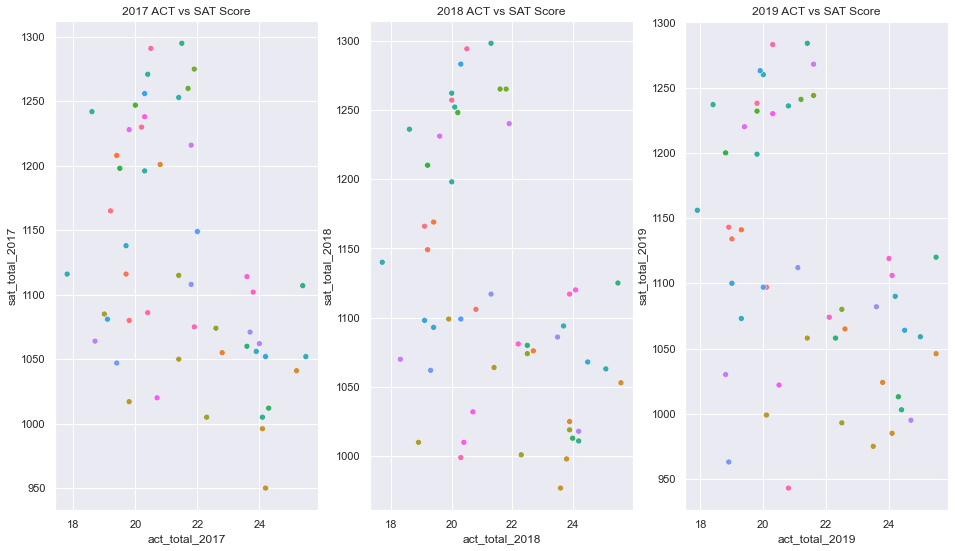

In [73]:
plt.figure(figsize = (16,9))

plt.subplot(1,3,1)
scatter_plt('act_total_2017', 'sat_total_2017' , df_sat_act , 'State' , '2017 ACT vs SAT Score')

plt.subplot(1,3,2)
scatter_plt('act_total_2018', 'sat_total_2018' , df_sat_act , 'State' , '2018 ACT vs SAT Score')

plt.subplot(1,3,3)
scatter_plt('act_total_2019', 'sat_total_2019' , df_sat_act , 'State' , '2019 ACT vs SAT Score')

### 3.2 ACT and SAT Participation Rate Per Year
---

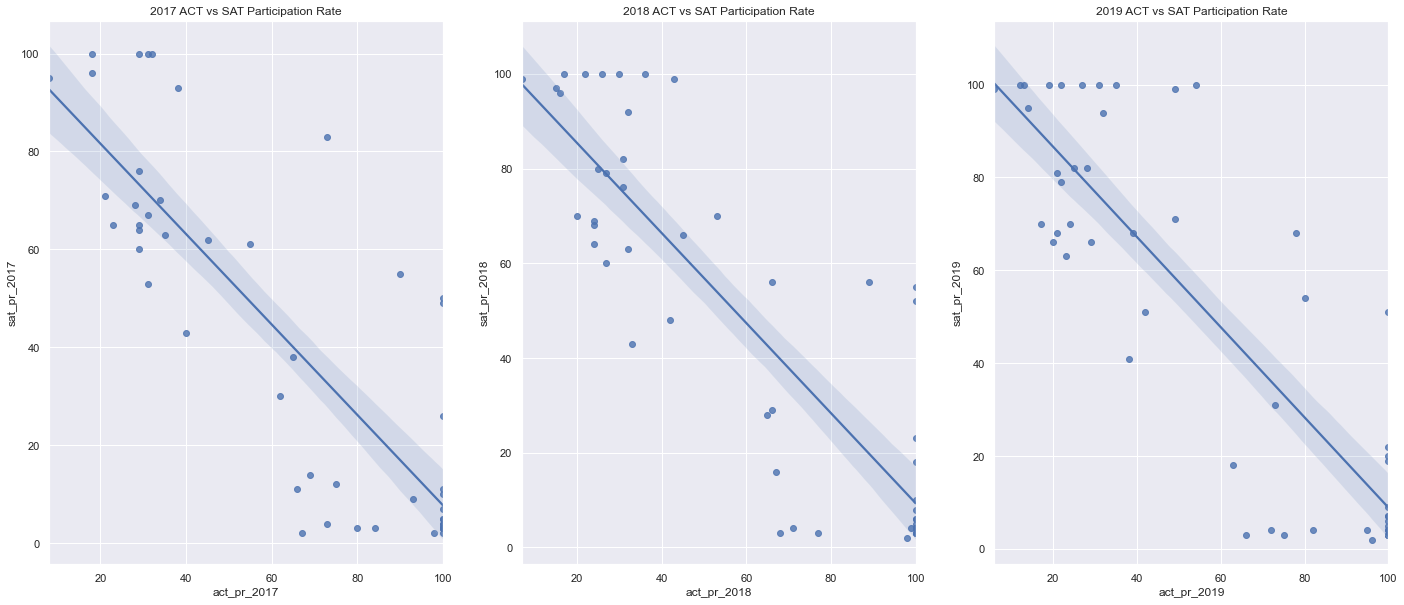

In [74]:
plt.figure(figsize = (24,10))

plt.subplot(1,3,1)
regression_plt('act_pr_2017', 'sat_pr_2017' , df_sat_act , '2017 ACT vs SAT Participation Rate')

plt.subplot(1,3,2)
regression_plt('act_pr_2018', 'sat_pr_2018' , df_sat_act , '2018 ACT vs SAT Participation Rate')

plt.subplot(1,3,3)
regression_plt('act_pr_2019', 'sat_pr_2019' , df_sat_act , '2019 ACT vs SAT Participation Rate')

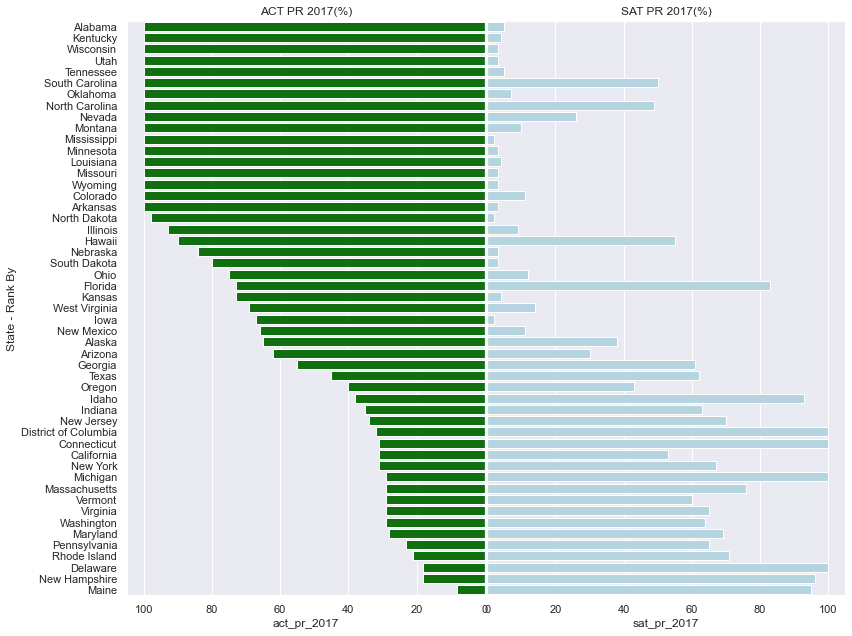

In [75]:
# Plotting Participation Rate across 3 Years

# 2017 Participation Rate Sorted By ACT from Top

double_barplot_plt(df_sat_act , 'act_pr_2017' , 'act_pr_2017' , 'sat_pr_2017' , 'ACT PR 2017(%)' , 'SAT PR 2017(%)')

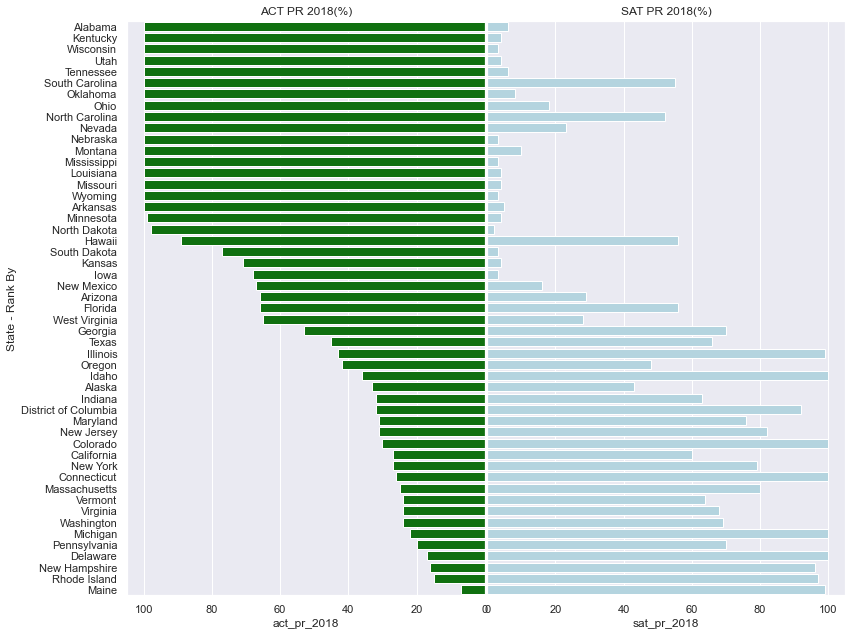

In [76]:
# 2018 Participation Rate Sorted By ACT from Top

double_barplot_plt(df_sat_act , 'act_pr_2018' , 'act_pr_2018' , 'sat_pr_2018' , 'ACT PR 2018(%)' , 'SAT PR 2018(%)')

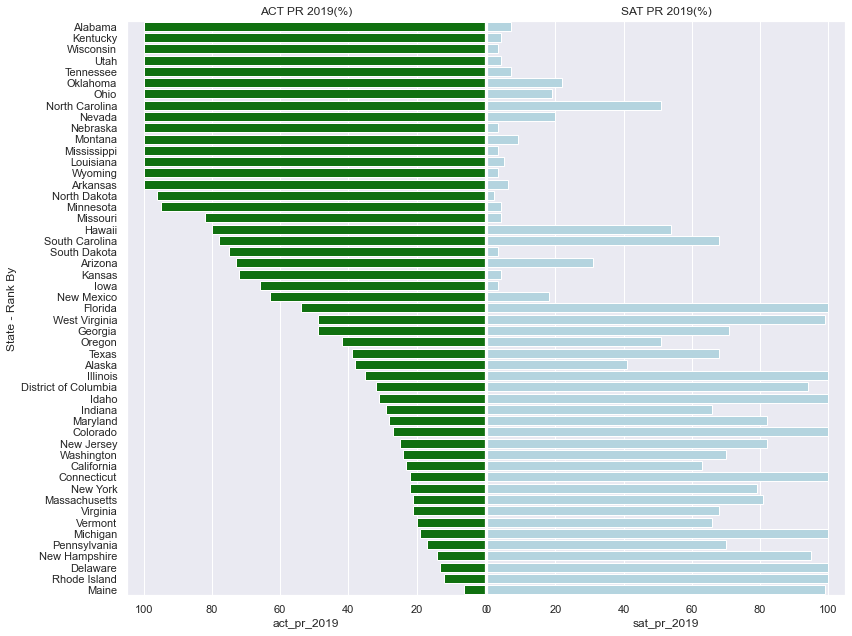

In [77]:
# 2019 Participation Rate Sorted By ACT from Top
double_barplot_plt(df_sat_act , 'act_pr_2019' , 'act_pr_2019' , 'sat_pr_2019' , 'ACT PR 2019(%)' , 'SAT PR 2019(%)')

### 3.3 Plot of Participation Rate vs Score Per Year Per Test
---

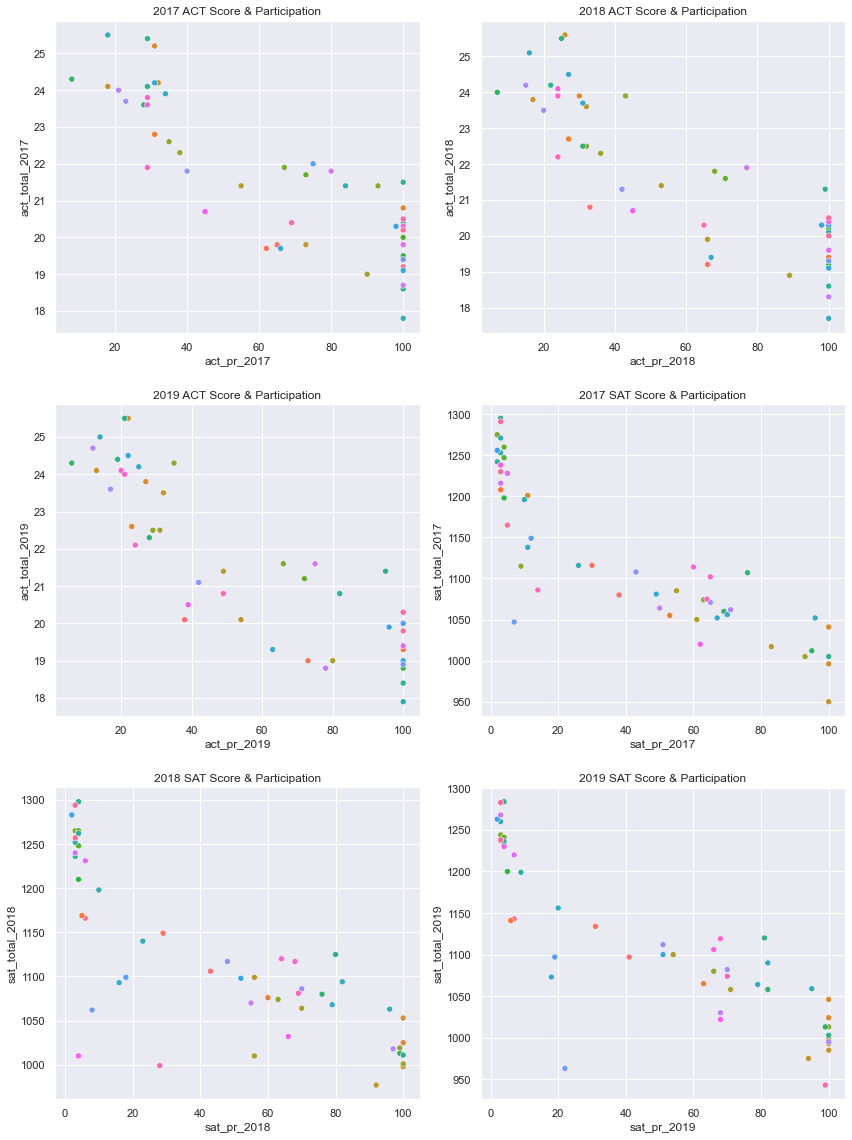

In [78]:
plt.figure(figsize = (12,16))

plt.subplot(3,2,1)
scatter_plt('act_pr_2017', 'act_total_2017' , df_sat_act , 'State' , '2017 ACT Score & Participation')

plt.subplot(3,2,2)
scatter_plt('act_pr_2018', 'act_total_2018' , df_sat_act , 'State' , '2018 ACT Score & Participation')

plt.subplot(3,2,3)
scatter_plt('act_pr_2019', 'act_total_2019' , df_sat_act , 'State' , '2019 ACT Score & Participation')

plt.subplot(3,2,4)
scatter_plt('sat_pr_2017', 'sat_total_2017' , df_sat_act , 'State' , '2017 SAT Score & Participation')

plt.subplot(3,2,5)
scatter_plt('sat_pr_2018', 'sat_total_2018' , df_sat_act , 'State' , '2018 SAT Score & Participation')

plt.subplot(3,2,6)
scatter_plt('sat_pr_2019', 'sat_total_2019' , df_sat_act , 'State' , '2019 SAT Score & Participation')

plt.tight_layout(h_pad = 2)

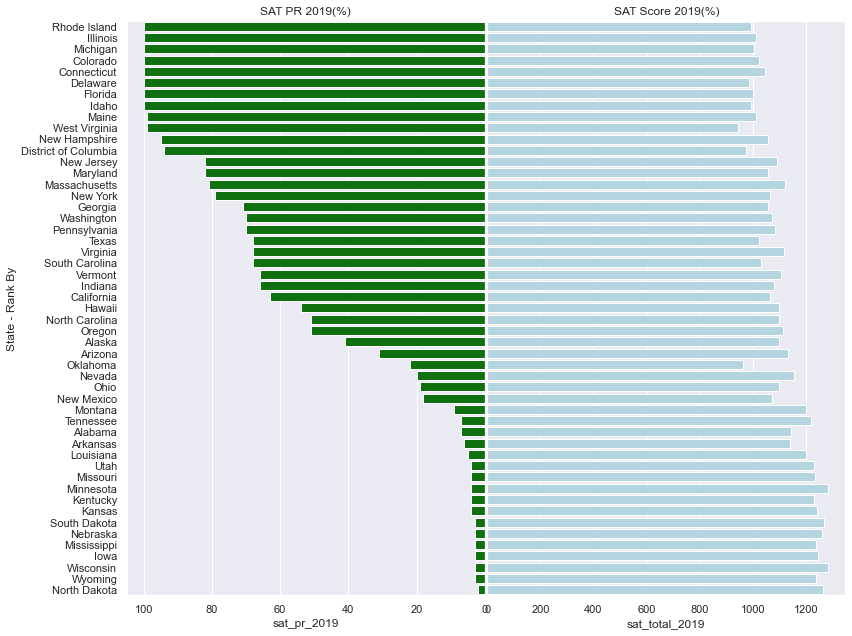

In [79]:
# Plotting Participation Rate against SAT Score in 2019

double_barplot_plt(df_sat_act , 'sat_pr_2019' , 'sat_pr_2019' , 'sat_total_2019' , 'SAT PR 2019(%)' , 'SAT Score 2019(%)')

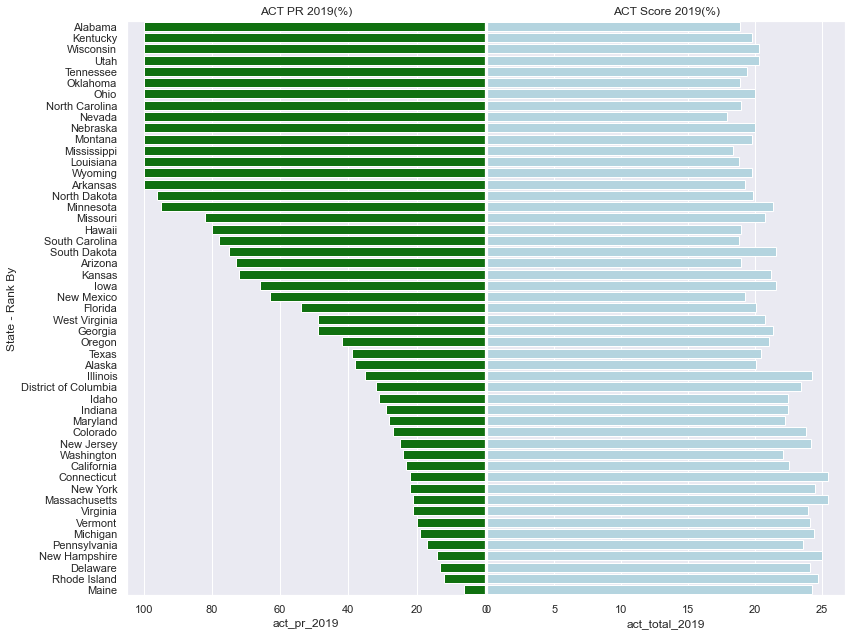

In [80]:
# Plotting Participation Rate against ACT Score in 2019

double_barplot_plt(df_sat_act , 'act_pr_2019' , 'act_pr_2019' , 'act_total_2019' , 'ACT PR 2019(%)' , 'ACT Score 2019(%)')

___
## 4.0 Additional Research (Group Project)
---

As part of JustHangOn Consulting Group, we have been tasked by US Education department to provide recommendation on **how might we** be able to increase the SAT /ACT participate rate and score , **so that** the US education ranking system remain competitive and relevant globally.

We will be studying the trends into the effect of individual key category in, and will provide key insights base on the following key category :
- States,
- Races,
- College Major,
- Household Income and State Income,
- Fee Waiver and Grant

As part of the team undertaking this study, I will be going deep into **Household Income and State Income** relation with participation rate and score

Extra Resources
- https://www.census.gov/topics/income-poverty.html
- https://worldpopulationreview.com/state-rankings/average-income-by-state
- https://www.census.gov/library/visualizations/interactive/2019-median-household-income.html
- https://fred.stlouisfed.org/release/tables?eid=259515&rid=249#
- https://www.collegeraptor.com/getting-in/articles/act-sat/states-act-sat-given-free/
- https://mindfish.com/which-states-require-the-sat/
- https://www.statology.org/what-is-a-strong-correlation/

### 4.1 Import Datasets
___

In [81]:
df_income = pd.read_csv('../data/household_income_2019.csv')
df_income.head()

State  2019 Household Median Income  2019 Household Ranking  \
0     Alabama                         51734                      47   
1      Alaska                         75463                      13   
2     Arizona                         62055                      29   
3    Arkansas                         48952                      49   
4  California                         80440                       6   

   2019 Gini Coeff  2019 Gini Ranking  2019 Poverty Rate  
0            0.474                 19               15.5  
1            0.438                 47               10.1  
2            0.459                 30               13.5  
3            0.475                 14               16.2  
4            0.487                  6               11.8

### 4.2a Merging Datasets
___

In [82]:
df_sat_act_income = df_sat_act.merge(df_income,
                                     on = 'State',
                                     how = 'left')

df_sat_act_income.head()

State  sat_pr_2017  sat_ebrw_2017  sat_math_2017  sat_total_2017  \
0     Alabama          5.0            593            572            1165   
1      Alaska         38.0            547            533            1080   
2     Arizona         30.0            563            553            1116   
3    Arkansas          3.0            614            594            1208   
4  California         53.0            531            524            1055   

   sat_pr_2018  sat_ebrw_2018  sat_math_2018  sat_total_2018  sat_pr_2019  \
0          6.0            595            571            1166          7.0   
1         43.0            562            544            1106         41.0   
2         29.0            577            572            1149         31.0   
3          5.0            592            576            1169          6.0   
4         60.0            540            536            1076         63.0   

   ...  act_total_2017  act_pr_2018  act_total_2018  act_pr_2019  \
0  ...            19.2        100.0            19.1        100.0   
1  ...            19.8         33.0            20.8         38.0   
2  ...            19.7         66.0            19.2         73.0   
3  ...            19.4        100.0            19.4        100.0   
4  ...            22.8         27.0            22.7         23.0   

   act_total_2019  2019 Household Median Income  2019 Household Ranking  \
0            18.9                         51734                      47   
1            20.1                         75463                      13   
2            19.0                         62055                      29   
3            19.3                         48952                      49   
4            22.6                         80440                       6   

   2019 Gini Coeff  2019 Gini Ranking  2019 Poverty Rate  
0            0.474                 19               15.5  
1            0.438                 47               10.1  
2            0.459                 30               13.5  
3            0.475                 14               16.2  
4            0.487                  6               11.8  

[5 rows x 24 columns]

### 4.2b Updated Data Dictionary
---

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|index|SAT/ACT|State names for 50 states in the US, plus District of Columbia|
|sat_pr_2017|float|SAT|State-wide participation rate (%) in 2017| 
|sat_erbw_2017|int|SAT|State mean score for Evidence-Based Reading and Writing (ERW) in 2017|
|sat_math_2017|int|SAT|State mean score for Math in 2017|
|sat_total_2017|int|SAT|State mean total (combined score for ERW and Math) in 2018|
|sat_pr_2018|float|SAT|State-wide participation rate (%) in 2018| 
|sat_erbw_2018|int|SAT|State mean score for Evidence-Based Reading and Writing (ERW) in 2018|
|sat_math_2018|int|SAT|State mean score for Math in 2018|
|sat_total_2018|int|SAT|State mean total (combined score for ERBW and Math) in 2018|
|sat_pr_2019|float|SAT|State-wide participation rate (%) in 2019| 
|sat_erbw_2019|int|SAT|State mean score for Evidence-Based Reading and Writing (ERBW) in 2019|
|sat_math_2019|int|SAT|State mean score for Math in 2019|
|sat_total_2019|int|SAT|State mean total (combined score for ERBW and Math) in 2019|
||
|act_pr_2017|float|ACT|State-wide participation rate (%) in 2017| 
|act_total_2017|float|ACT|State mean composite score (average score for English, Math, Reading, and Science) in 2017|
|act_pr_2018|float|ACT|State-wide participation rate (%) in 2018| 
|act_total_2018|float|ACT|State mean composite score (average score for English, Math, Reading, and Science) in 2018|
|act_pr_2019|float|ACT|State-wide participation rate (%) in 2019| 
|act_total_2019|float|ACT|State mean composite score (average score for English, Math, Reading, and Science) in 2019|
||
|2019 Household Median Income|float|State|2019 Median Household Income by US States| 
|2019 Household Ranking|float|State|2019 Median Household Income Ranking by US States. No.1 has highest median household income|
|2019 Gini Coeff|float|State|2019 Gini Coefficient by US States| 
|2019 Gini Ranking|float|State|2019 Gini Coeff Ranking by US States. No.1 has lowest Gini Coeff.|
|2019 Poverty Rate|float|State|2019 Poverty Rate in % by US States| 

### 4.3 Certain States mandates ACT and SAT as compulsory

- In this section , we will compare whether there is any differences between considering states that mandates compulsory against those that not and their impact on the scores , participation due to income features. Further read can be found from the link below on which states has mandatory SAT and ACT
<br><br>

- https://www.collegeraptor.com/getting-in/articles/act-sat/states-act-sat-given-free/
- https://mindfish.com/which-states-require-the-sat/
___

In [83]:
mandatory_SAT = ['Colorado', 'Connecticut', 'Delaware', 'Illinois', 'Michigan', 'New Hampshire', 'Rhode Island', 'West Virginia']
mandatory_ACT = ['Alabama', 'Hawaii', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'North Carolina', 'South Carolina', 'Utah', 'Wisconsin', 'Wyoming']

In [84]:
df_sat_act_income_nonmandate = df_sat_act_income[~df_sat_act_income['State'].isin(mandatory_SAT)]

df_sat_act_income_nonmandate = df_sat_act_income_nonmandate[~df_sat_act_income_nonmandate['State'].isin(mandatory_ACT)]

## Correlation of Income Features against Score and Participation Rate

1. Base on correlation heatmap , poverty rate and household median income has a moderately strong impact on ACT score (~0.6).
2. Since Poverty and household income strong correlation with each other, we will take 1 of these 2 to further study into the score and PR.
- Link on Corr Score : https://www.statology.org/what-is-a-strong-correlation/
___

In [85]:
# Creating a new list for the income features vs the test score
poverty_feature = ['2019 Household Median Income' , '2019 Gini Coeff' , '2019 Poverty Rate' , 'sat_total_2019' , 'act_total_2019' , 'sat_pr_2019' , 'act_pr_2019']

x1 = df_sat_act_income[poverty_feature].corr()
x2 = df_sat_act_income_nonmandate[poverty_feature].corr()

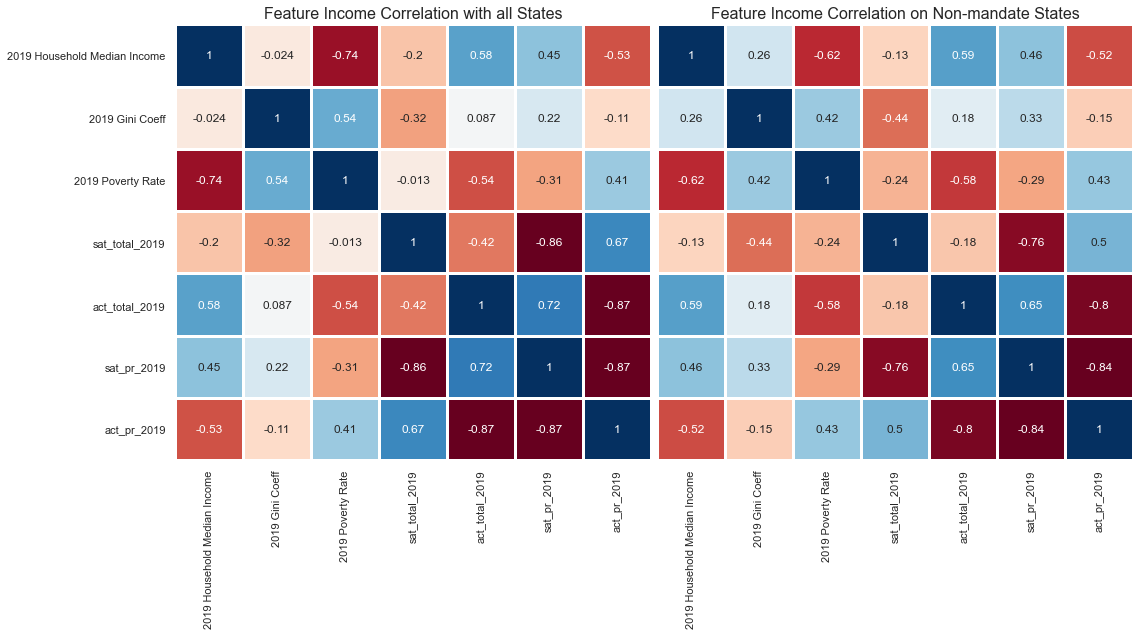

In [86]:
fig, (ax1 , ax2) = plt.subplots(1,2, figsize = (16,9) , sharey = True)


sns.heatmap(data = x1,
            cmap = 'RdBu',
            annot =True,
            linewidths = 2,
            cbar = False,
            ax = ax1)
          
ax1.set_title('Feature Income Correlation with all States' , fontsize = 16)



sns.heatmap(data = x2,
            cmap = 'RdBu',
            annot =True,
            linewidths = 2,
            cbar = False,
            ax = ax2)

ax2.set_title('Feature Income Correlation on Non-mandate States' , fontsize = 16)


plt.xticks(rotation  = 90)
plt.yticks(rotation  = 0)
plt.tight_layout(w_pad = 0.5)

### 4.4 Median HouseHold income against test score
___

- It is observed that Household Income had a relatively strong correlation with the ACT score , but not the SAT score.
- Consider all State , based on the bottom 12 median income state, only 1/12 state score above the 25% for ACT while 9/12 state score above the 25% percentile for SAT.
- Consider only non-mandatory state , based on the bottom 5 median income state, only 1/5 state score above the 25% for ACT while 1/5 state score above the 25% percentile for SAT.

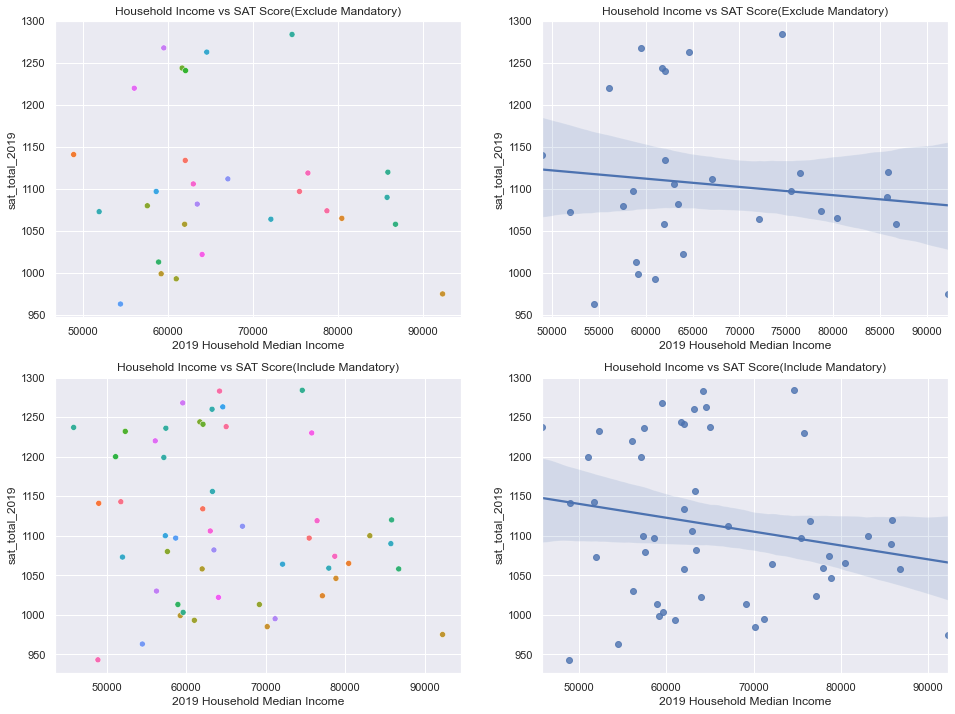

In [87]:
plt.figure(figsize = (16,12))

plt.subplot(2,2,1)
scatter_plt('2019 Household Median Income' , 'sat_total_2019' , df_sat_act_income_nonmandate , 'State' , 'Household Income vs SAT Score(Exclude Mandatory)' )

plt.subplot(2,2,2)
regression_plt('2019 Household Median Income' , 'sat_total_2019' , df_sat_act_income_nonmandate , 'Household Income vs SAT Score(Exclude Mandatory)')

plt.subplot(2,2,3)
scatter_plt('2019 Household Median Income' , 'sat_total_2019' , df_sat_act_income , 'State' , 'Household Income vs SAT Score(Include Mandatory)' )

plt.subplot(2,2,4)
regression_plt('2019 Household Median Income' , 'sat_total_2019' , df_sat_act_income , 'Household Income vs SAT Score(Include Mandatory)')

#### 4.4.1 Comparison of score and income considering all states and only non-mandatory state

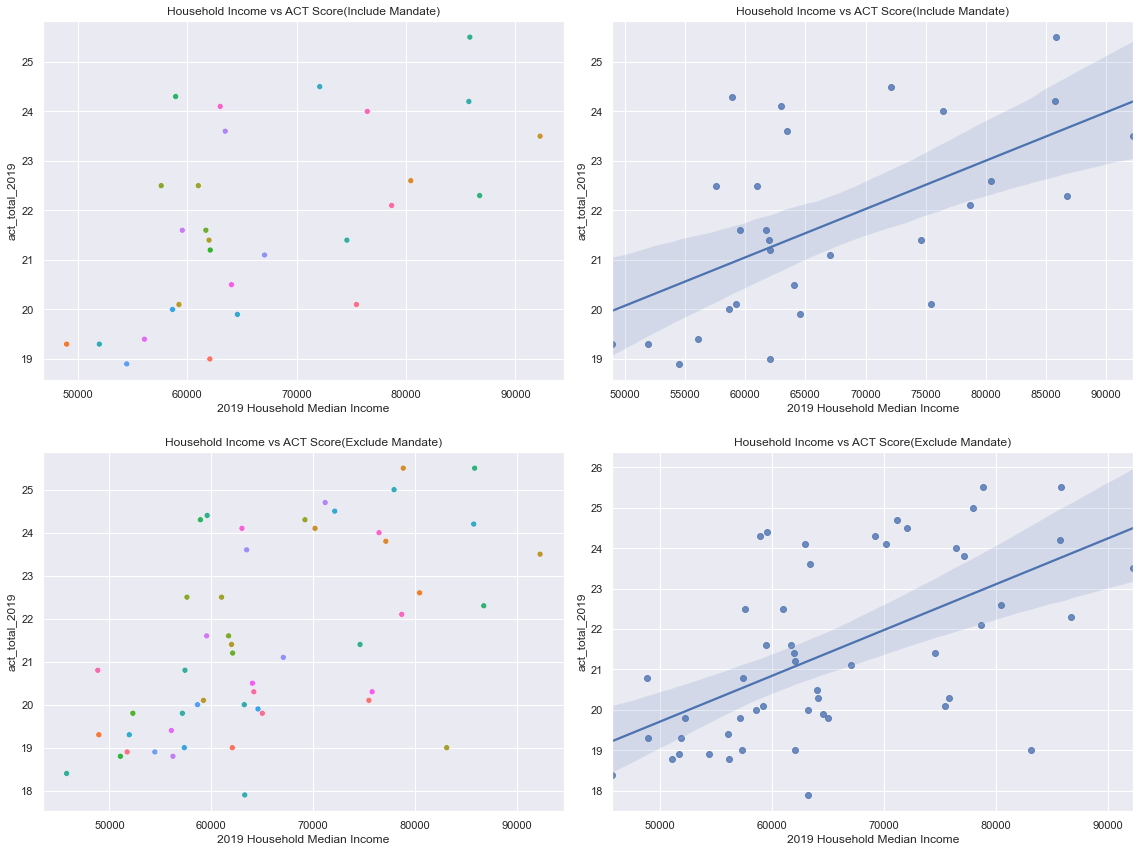

In [88]:
plt.figure(figsize = (16,12))

plt.subplot(2,2,1)
scatter_plt('2019 Household Median Income' , 'act_total_2019' , df_sat_act_income_nonmandate , 'State' , 'Household Income vs ACT Score(Include Mandate)' )

plt.subplot(2,2,2)
regression_plt('2019 Household Median Income' , 'act_total_2019' , df_sat_act_income_nonmandate , 'Household Income vs ACT Score(Include Mandate)')

plt.subplot(2,2,3)
scatter_plt('2019 Household Median Income' , 'act_total_2019' , df_sat_act_income , 'State' , 'Household Income vs ACT Score(Exclude Mandate)' )

plt.subplot(2,2,4)
regression_plt('2019 Household Median Income' , 'act_total_2019' , df_sat_act_income , 'Household Income vs ACT Score(Exclude Mandate)')

plt.tight_layout(h_pad = 2)

#### 4.4.2 Comparison of score and income considering all state

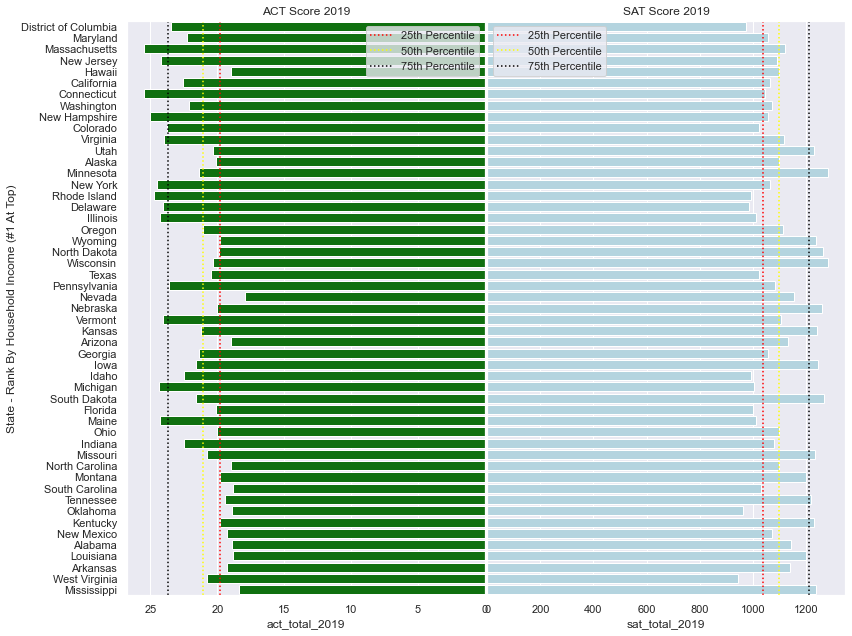

In [89]:
income_2019 = df_sat_act_income.sort_values(by = '2019 Household Median Income', ascending = False)


fig, (ax1 , ax2) = plt.subplots(1,2 , figsize = (12,9) , sharey = True)


sns.barplot(x = 'act_total_2019' , 
            y = income_2019['State'], 
            data = df_sat_act_income,
            color = 'Green',
            ax = ax1)
ax1.invert_xaxis()
ax1.set_ylabel('State - Rank By Household Income (#1 At Top)')

# Line marker for ACT Percentile Value. Value obtained from df.describe()
ax1.axvline(x=19.8,linestyle='dotted',color='red',label='25th Percentile')
ax1.axvline(x=21.1,linestyle='dotted',color='yellow',label='50th Percentile')
ax1.axvline(x=23.7,linestyle='dotted',color='black',label='75th Percentile')
ax1.legend()
ax1.set_title('ACT Score 2019')



sns.barplot(x = 'sat_total_2019' , 
            y = income_2019['State'], 
            data = df_sat_act_income,
            color = 'lightblue',
            ax= ax2)
ax2.set_ylabel('')

# Line marker for SAT Percentile Value. Value obtained from df.describe()
ax2.axvline(x=1038,linestyle='dotted',color='red',label='25th Percentile')
ax2.axvline(x=1097,linestyle='dotted',color='yellow',label='50th Percentile')
ax2.axvline(x=1210,linestyle='dotted',color='black',label='75th Percentile')
ax2.legend()

ax2.set_title('SAT Score 2019')

plt.tight_layout(w_pad= -0.3)

#### 4.4.3 Comparison of score and income considering only non-mandatory state

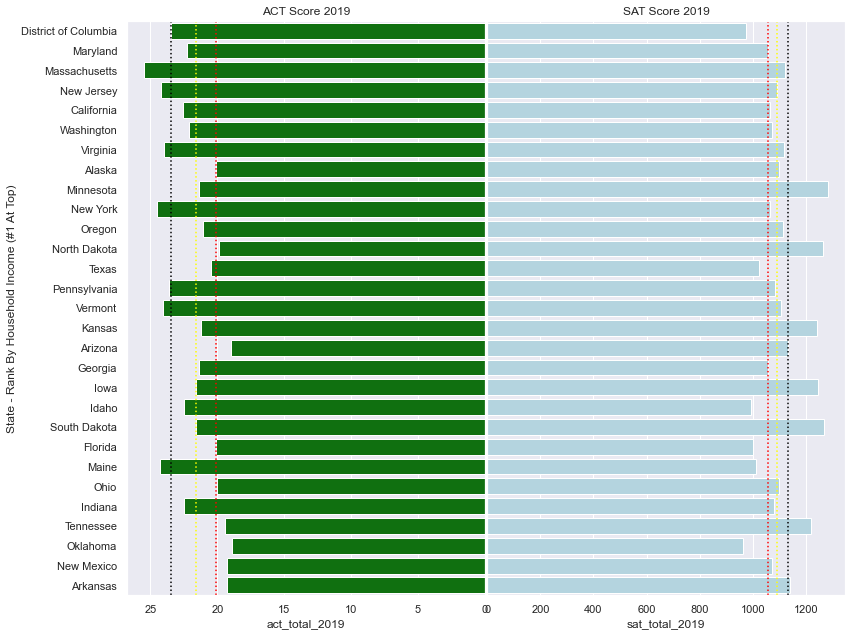

In [90]:
income_2019 = df_sat_act_income_nonmandate.sort_values(by = '2019 Household Median Income', ascending = False)


fig, (ax1 , ax2) = plt.subplots(1,2 , figsize = (12,9) , sharey = True)

# Plot for ACT score on the left side
sns.barplot(x = 'act_total_2019' , 
            y = income_2019['State'], 
            data = df_sat_act_income_nonmandate,
            color = 'Green',
            ax = ax1)
ax1.invert_xaxis()

# Line marker for ACT Percentile Value. Value obtained from df.describe()
ax1.axvline(x=20.1,linestyle='dotted',color='red',label='25th Percentile')
ax1.axvline(x=21.6,linestyle='dotted',color='yellow',label='50th Percentile')
ax1.axvline(x=23.5,linestyle='dotted',color='black',label='75th Percentile')

ax1.set_ylabel('State - Rank By Household Income (#1 At Top)')
ax1.set_title('ACT Score 2019')

# Plot for SAT score on the right side
sns.barplot(x = 'sat_total_2019' , 
                  y = income_2019['State'], 
                  data = df_sat_act_income_nonmandate,
                  color = 'lightblue',
                  ax= ax2)
ax2.set_ylabel('')
ax2.axvline(x=1058,linestyle='dotted',color='red',label='25th Percentile')
ax2.axvline(x=1090,linestyle='dotted',color='yellow',label='50th Percentile')
ax2.axvline(x=1134,linestyle='dotted',color='black',label='75th Percentile')


ax2.set_title('SAT Score 2019')

plt.tight_layout(w_pad= -0.3)

### 4.5 Median HouseHold income against Participation Rate
___

- Out of the 12 least median household income state , 9 out of 12 states had high PR in ACT.

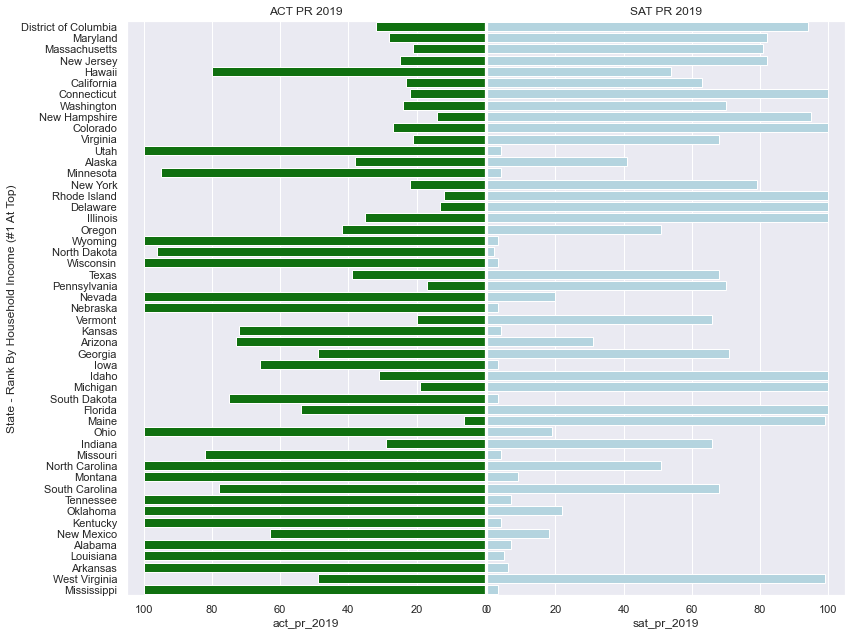

In [91]:
"""
- Participation Rate for All State plot against average household income. 
- Highest average income ranked from the top
"""

income_2019 = df_sat_act_income.sort_values(by = '2019 Household Median Income', ascending = False)


fig, (ax1 , ax2) = plt.subplots(1,2 , figsize = (12,9) , sharey = True)


sns.barplot(x = 'act_pr_2019' , 
            y = income_2019['State'], 
            data = df_sat_act_income,
            color = 'Green',
            ax = ax1)
ax1.invert_xaxis()
ax1.set_ylabel('State - Rank By Household Income (#1 At Top)')
ax1.set_title('ACT PR 2019')


sns.barplot(x = 'sat_pr_2019' , 
            y = income_2019['State'], 
            data = df_sat_act_income,
            color = 'lightblue',
            ax= ax2)
ax2.set_ylabel('')
ax2.set_title('SAT PR 2019')

plt.tight_layout(w_pad= -0.3)

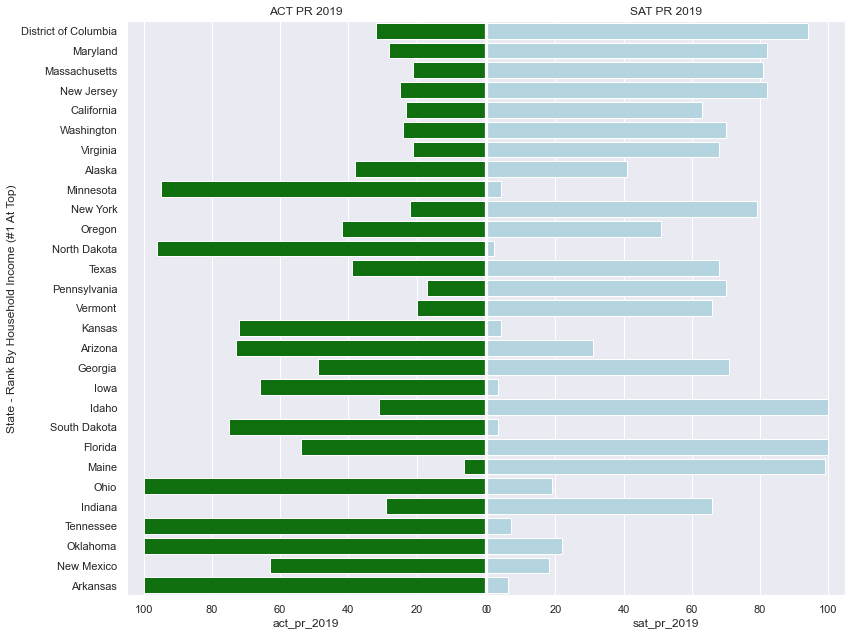

In [92]:
"""
- Participation Rate for Non-Mandatory State plot against average household income. 
- Highest average income ranked from the top
"""

income_2019 = df_sat_act_income_nonmandate.sort_values(by = '2019 Household Median Income', ascending = False)


fig, (ax1 , ax2) = plt.subplots(1,2 , figsize = (12,9) , sharey = True)


sns.barplot(x = 'act_pr_2019' , 
            y = income_2019['State'], 
            data = df_sat_act_income_nonmandate,
            color = 'Green',
            ax = ax1)
ax1.invert_xaxis()
ax1.set_ylabel('State - Rank By Household Income (#1 At Top)')
ax1.set_title('ACT PR 2019')


sns.barplot(x = 'sat_pr_2019' , 
            y = income_2019['State'], 
            data = df_sat_act_income_nonmandate,
            color = 'lightblue',
            ax= ax2)
ax2.set_ylabel('')
ax2.set_title('SAT PR 2019')

plt.tight_layout(w_pad= -0.3)

### 4.6 Median HouseHold income against ACT & Participation Rate
___

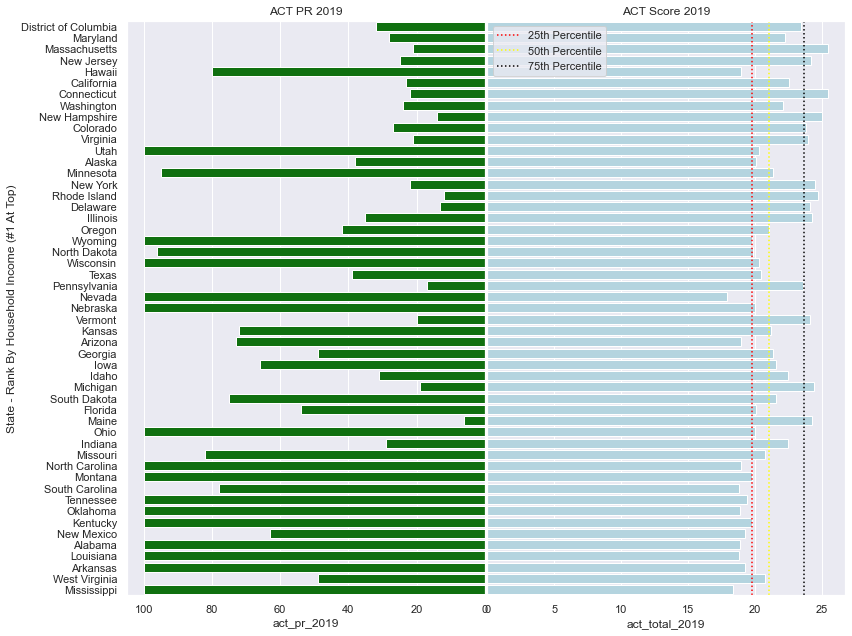

In [93]:
income_2019 = df_sat_act_income.sort_values(by = '2019 Household Median Income', ascending = False)


fig, (ax1 , ax2) = plt.subplots(1,2 , figsize = (12,9) , sharey = True)


sns.barplot(x = 'act_pr_2019' , 
            y = income_2019['State'], 
            data = df_sat_act_income,
            color = 'Green',
            ax = ax1)
ax1.invert_xaxis()
ax1.set_ylabel('State - Rank By Household Income (#1 At Top)')



ax1.set_title('ACT PR 2019')



sns.barplot(x = 'act_total_2019' , 
            y = income_2019['State'], 
            data = df_sat_act_income,
            color = 'lightblue',
            ax= ax2)
ax2.set_ylabel('')

# Line marker for ACT Percentile Value. Value obtained from df.describe()
ax2.axvline(x=19.8,linestyle='dotted',color='red',label='25th Percentile')
ax2.axvline(x=21.1,linestyle='dotted',color='yellow',label='50th Percentile')
ax2.axvline(x=23.7,linestyle='dotted',color='black',label='75th Percentile')
ax2.legend()


ax2.set_title('ACT Score 2019')

plt.tight_layout(w_pad= -0.3)

### 4.7 Map Visualisation of State Median Household Income and ACT Score
___

- Area with low median household income (Light Green) and low ACT Score (Light Green) are primarily located on the Southern Eastern region - Mainly : MS , AR , LS , AL , OK

- The above mentioned states also had the highest ACT Participation Rate (Dark Green)

In [94]:
df_state_abbreviation  = pd.read_csv('../data/state_abbreviation.csv')

df_state_abbreviation.head()

State state_abbreviation
0     Alabama                 AL
1      Alaska                 AK
2     Arizona                 AZ
3    Arkansas                 AR
4  California                 CA

In [95]:
df_sat_act_income = df_sat_act_income.merge(df_state_abbreviation,
                                            on = 'State',
                                            how = 'left')

df_sat_act_income.head()

State  sat_pr_2017  sat_ebrw_2017  sat_math_2017  sat_total_2017  \
0     Alabama          5.0            593            572            1165   
1      Alaska         38.0            547            533            1080   
2     Arizona         30.0            563            553            1116   
3    Arkansas          3.0            614            594            1208   
4  California         53.0            531            524            1055   

   sat_pr_2018  sat_ebrw_2018  sat_math_2018  sat_total_2018  sat_pr_2019  \
0          6.0            595            571            1166          7.0   
1         43.0            562            544            1106         41.0   
2         29.0            577            572            1149         31.0   
3          5.0            592            576            1169          6.0   
4         60.0            540            536            1076         63.0   

   ...  act_pr_2018  act_total_2018  act_pr_2019  act_total_2019  \
0  ...        100.0            19.1        100.0            18.9   
1  ...         33.0            20.8         38.0            20.1   
2  ...         66.0            19.2         73.0            19.0   
3  ...        100.0            19.4        100.0            19.3   
4  ...         27.0            22.7         23.0            22.6   

   2019 Household Median Income  2019 Household Ranking  2019 Gini Coeff  \
0                         51734                      47            0.474   
1                         75463                      13            0.438   
2                         62055                      29            0.459   
3                         48952                      49            0.475   
4                         80440                       6            0.487   

   2019 Gini Ranking  2019 Poverty Rate  state_abbreviation  
0                 19               15.5                  AL  
1                 47               10.1                  AK  
2                 30               13.5                  AZ  
3                 14               16.2                  AR  
4                  6               11.8                  CA  

[5 rows x 25 columns]

In [96]:
# Choropleth for Household Median Income 2019
fig = px.choropleth(locations=df_sat_act_income['state_abbreviation'], 
                    locationmode="USA-states", 
                    scope="usa", 
                    color=df_sat_act_income['2019 Household Median Income'],
                    title = 'Median Household Income 2019',
                    color_continuous_scale = 'greens')


# Choropleth for ACT Score 2019
fig2 = px.choropleth(locations=df_sat_act_income['state_abbreviation'], 
                    locationmode="USA-states", 
                    scope="usa", 
                    color=df_sat_act_income['act_total_2019'],
                    title = 'ACT Score 2019',
                    color_continuous_scale = 'greens')

# Choropleth for ACT Participation Rate(PR) 2019
fig3 = px.choropleth(locations=df_sat_act_income['state_abbreviation'], 
                    locationmode="USA-states", 
                    scope="usa", 
                    color=df_sat_act_income['act_pr_2019'],
                    title = 'ACT Participation Rate 2019',
                    color_continuous_scale = 'greens')
fig.show()
fig2.show()
fig3.show()

## 5.0 Conclusions and Recommendations

By doing a systematic zoom-in on the effect of household income on the test score, we summarised our key insights as below :

### Key Insights
1. Base on correlation heatmap , poverty rate and household median income has a moderately strong impact on ACT score (~0.6). Since Poverty Rate and household income strong correlation with each other, we will take 1 of these 2 to further study into the score and PR.
2. It is observed that Household Income had a relatively strong correlation with the ACT score , but not the SAT score.
3. Consider all State , based on the bottom 12 median income state, only 1/12 state score above the 25% for ACT while 9/12 state score above the 25% percentile for SAT. Consider only non-mandatory state , based on the bottom 5 median income state, only 1/5 state score above the 25% for ACT while 1/5 state score above the 25% percentile for SAT.
4. Out of the 12 least median household income state , 9 out of 12 states had high PR in ACT.


### Recommendation
Based on limited resources , the government should focus on fininicial aid to lower median household in Mississippi , Arkansas , Louisiana , Alabama, Kentucky , Oklahoma aiming to take ACT so that the state can aim to increase their score toward the 25% score percentile by 2021

## 6.0 Recommendation from other factors

My other teammates had covered the impact and corresponding recommendation from their study on race demographic , finanicial aid , states and college major. These will be summarised in the PDF / PPT slide decks in another document.